# 군집

레이블이 없는 데이터에 대해서 학습할 때, 비슷한 것들을 클러스터(군집)으로 모으는 것

# K-평균

In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [8]:
#예제 데이터 생성

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [
        [0.2, 2.3],
        [-1.5, 2.3],
        [-2.8, 1.8],
        [-2.8, 2.8],
        [-2.8, 1.3]
    ]
)

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X,y = make_blobs(n_samples=2000, centers=blob_centers,
                cluster_std=blob_std, random_state=7)

In [4]:
def plot_cluster(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

그림 저장: blobs_plot


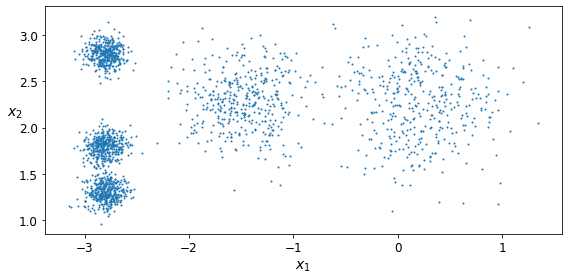

In [9]:
plt.figure(figsize=(8, 4))
plot_cluster(X)
save_fig("blobs_plot")
plt.show()

In [34]:
# 훈련

from sklearn.cluster import KMeans

k = 5 #알고리즘이 찾을 클러스터 개수 k
kmeans = KMeans(n_clusters=k, n_jobs=-1)
y_pred = kmeans.fit_predict(X)

y_pred, y_pred is kmeans.labels_

c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


(array([0, 3, 1, ..., 2, 1, 3]), True)

In [11]:
#중심점들

kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [14]:
# 결정 경계

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#                 marker='o', s=30, linewidths=8,
#                 color=circle_color, zorder=10, alpha=0.9)
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#                 marker='x', s=50, linewidths=50,
#                 color=cross_color, zorder=11, alpha=1)
    for idx, cent in enumerate(centroids):
        plt.annotate(str(idx), (cent[0], cent[1]), fontsize=14, weight='bold', color='red')

def plot_decision_boundaries(cluster, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1 #모든 점들의 x1, x2좌표 중에 가장 작은 x1, x2 좌표
    maxs = X.max(axis=0) + 0.1 #모든 점들의 x1, x2좌표 중에 가장 큰 x1, x2 좌표
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = cluster.predict(np.c_[xx.ravel(), yy.ravel()]) #그래프 영역 내의 모든 x1, x2좌표에 대한 예측값 Z
    Z = Z.reshape(xx.shape) #좌표 영역과 동일하게 재구성

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), #모든 좌표영역에 대한 예측 경계를 색깔로
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), #모든 좌표영역에 대한 예측 경계를 선으로
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(cluster.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

그림 저장: voronoi_plot


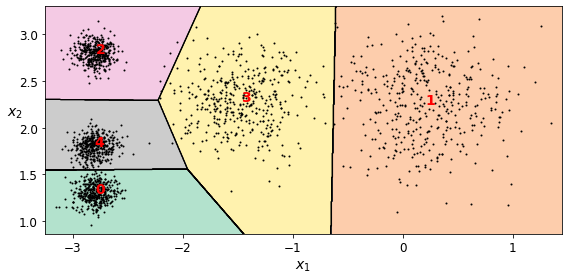

In [30]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

왼쪽 상단과 중간의 경계를 제외하면 잘 구분되었다.

k-평균은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다. 샘플을 클러스터에 할당할 때 센트로이드까지의 거리를 고려하기 때문

하드 군집 - 샘플을 하나의 클러스터에 할당

소프트 군집 - 클러스터마다 샘플에 점수를 부여

In [31]:
X_new = np.array([
    [-3, 1.2],
    [0, 2],
    [3, 2],
    [-3, 3],
    [-3, 2.5]
])

#하드 군집
print(kmeans.predict(X_new))

#소프트 군집
soft = kmeans.transform(X_new)

soft, np.argmin(soft, axis=1) #센트로이드 까지의 거리는 작을 수록 가깝다.

[0 1 1 2 2]


(array([[0.2236412 , 3.37790894, 1.60978757, 1.8787742 , 0.63235599],
        [2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
        [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
        [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
        [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]]),
 array([0, 1, 1, 2, 2], dtype=int64))

초기에 랜덤하게 센트로이드를 선정하고, 각 샘플을 가장 가까운 센트로이드에 할당한다.

그리고 센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트하고, 센트로이드가 더 이상 변경되지 않을 때 까지 반복한다.

초기에 랜덤한 위치를 잘못 고르면 엉뚱한 솔루션이 생길 수 있는데

그걸 방지하기 위해서 센트로이드 초기화를 개선할 필요가 있다

# 센트로이드 초기화 방법

In [33]:
#미리 알고 있는 센트로이드 위치 설정하기

good_init = np.array([
    [-3, 3],
    [-3, 2],
    [-3, 1],
    [-1, 2],
    [0, 2]
])

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, n_jobs=-1)

In [35]:
# 랜덤 초기화를 다르게 하여 여러번 알고리즘을 실행하고 가장 좋은 솔루션 선택
#기본 n_init은 10, 전체 알고리즘 10번 실행

#이너셔 - 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리(낮을 수록 좋음)
kmeans.inertia_

211.5985372581683

In [36]:
#예측기의 성능이 더 좋으려면 더 큰 점수가 나와야 함.
kmeans.score(X)

-211.5985372581683

Kmeans 클래스는 기본적으로 k-평균++ 알고리즘 사용.

랜덤하게 초기 센트로이드를 지정하려면 init="random"으로 설정. 하지만 필요성 없음

또한 Kmeans 클래스는 불필요한 거리 계산을 피하기 위해 삼각 부등식 사용.(원래 방식은 algorithm="full" 지정. 하지만 필요성 없음)

# 미니배치 k-평균

In [38]:
from sklearn.cluster import MiniBatchKMeans

mini_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
mini_kmeans.fit(X)

mini_kmeans.inertia_

211.93186531476786

In [39]:
#데이터 셋이 메모리에 들어가지 않는 경우 memmap사용

from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.target = mnist.target.astype(np.int64) #문자을 숫자로 변환

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=42)

In [41]:
#memmap에 데이터 기록

filename="my_mnist.data"
X_mm = np.memmap(filename, dtype="float32", mode='write', shape=X_train.shape)
X_mm[:] = X_train

mini_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
mini_kmeans.fit(X_mm)

mini_kmeans.inertia_

135436636162.0

미니 배치 k-평균이 일반 k-평균에 비해 훨씬 빠르지만 이너샤는 일반적으로 조금 더 나쁨. 특히 클러스터 개수가 증가할 때 그런 경향이 있음

# 최적의 클러스터 개수 찾기

이너샤는 k가 증가함에 따라 작아지므로 k를 찾을 때 이너샤는 좋은 성능지표가 아님

더 좋은 방법은 실루엣 점수

실루엣 점수 : 모든 샘플에 대한 실루엣 계수의 평균. 
1에 가까우면 자신의 클러스터에 잘 속한 것이고, 0에 가까우면 클러스터 경계에 위치, -1에 가까우면 잘못된 클러스터에 할당된 것

In [42]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\sources\python\deeplearning\dl\lib\site-packa

그림 저장: inertia_score_vs_k_plot


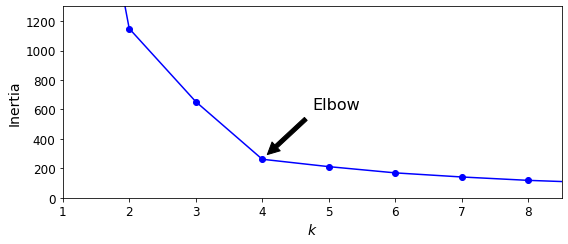

In [55]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(X)
               for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]] #레이블이 2개 이상이어야 비교가능하므로

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_score_vs_k_plot")
plt.show()

그림 저장: silhouette_score_vs_k_plot


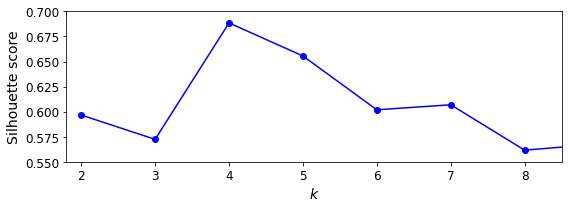

In [56]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

save_fig("silhouette_score_vs_k_plot")
plt.show()

이너샤는 k의 개수에대한 정보를 알 수 없지만, 실루엣 점수는 k에 대한 정보를 알 수 있음

k=4일때 가장 우수하며, k=5도 나쁘지는 않음을 알 수 있음

그림 저장: silhouette_analysis_plot


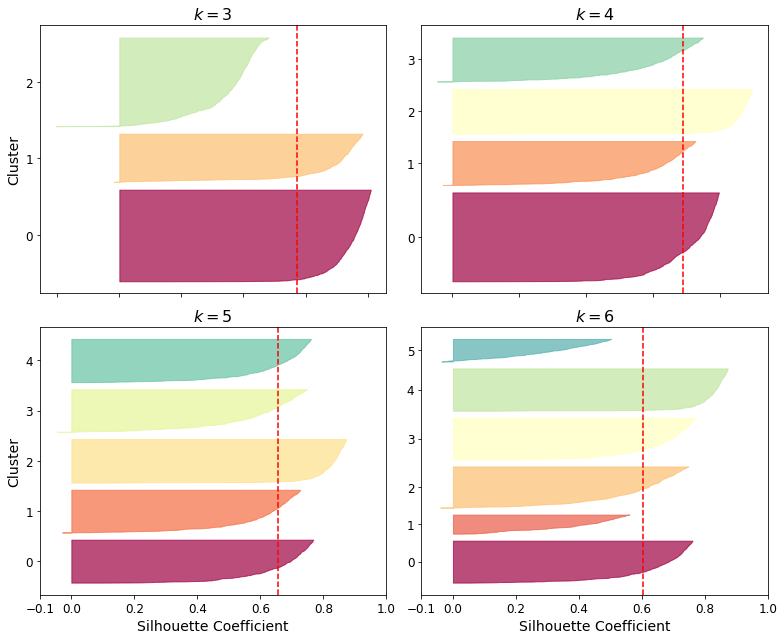

In [57]:
#실루엣 다이어그램
#각 클러스터마다 칼 모양의 그래프
#그래프의 높이는 클러스에 포함된 샘플의 개수
#너비는 이 클래스에 포함된 샘플의 정렬된 실루엣 계수(넓을 수록 좋다)


from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

수직 점선은 각 클러스터 개수에 해당하는 실루엣 점수

한 클러스터의 샘플 대부분이 이 점수보다 낮은 계수를 가지면, 클러스터의 샘플이 다른 클러스터와 너무 가깝다는 의미, 나쁜 클러스터

k=4, k=5가 좋아보임

실루엣 점수는 k=4가 더 좋았지만, 실루엣 다이어그램을 보면, k=5일때 클러스터의 크기가 더 비슷하므로 k=5가 더 좋은 선택

k-평균을 실행하기 전에 입력 특성을 스케일을 맞춰야 한다.

그렇지 않으면 클러스터가 타원형으로 길쭉해지고, k-평균의 결과가 좋지 않다.

이런 타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동한다.

# 군집을 사용한 이미지 분할

동일한 색상을 가진 픽셀을 같은 세그먼트에 할당

In [58]:
#이미지 로딩

from matplotlib.image import imread
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
image.shape

(533, 800, 3)

In [59]:
#이 이미지는 3차원 배열, 높이, 너비, 컬러 채널 개수(RGB)
image[:,:, 0] #0.0-1.0사이

array([[0.09803922, 0.09411765, 0.09411765, ..., 0.22352941, 0.21960784,
        0.20392157],
       [0.09411765, 0.09019608, 0.09019608, ..., 0.23529412, 0.23137255,
        0.21568628],
       [0.09019608, 0.08627451, 0.08627451, ..., 0.25882354, 0.24705882,
        0.22745098],
       ...,
       [0.05490196, 0.05490196, 0.05098039, ..., 0.05098039, 0.03529412,
        0.01960784],
       [0.05490196, 0.05490196, 0.04705882, ..., 0.04313726, 0.02745098,
        0.01176471],
       [0.05098039, 0.05098039, 0.04313726, ..., 0.03921569, 0.01960784,
        0.00784314]], dtype=float32)

In [63]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [65]:
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_] #각 픽셀이 속하는 클러스터의 RGB값 가지고 오기
segmented_img = segmented_img.reshape(image.shape)

kmeans.labels_.shape, kmeans.cluster_centers_.shape

((426400,), (8, 3))

In [69]:
kmeans.labels_.shape, kmeans.cluster_centers_.shape, kmeans.cluster_centers_, kmeans.labels_[:100], kmeans.cluster_centers_[[0, 1, 2, 3, 4, 5]]

((426400,),
 (8, 3),
 array([[0.09843324, 0.25207368, 0.01657709],
        [0.9830139 , 0.93258756, 0.02555561],
        [0.3702426 , 0.52151895, 0.15566345],
        [0.02248141, 0.10991025, 0.00575771],
        [0.21673869, 0.38444582, 0.05683472],
        [0.8759226 , 0.7170191 , 0.03706853],
        [0.60994637, 0.62979794, 0.38811627],
        [0.76659656, 0.1976155 , 0.04361701]], dtype=float32),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
 array([[0.09843324, 0.25207368, 0.01657709],
        [0.9830139 , 0.93258756, 0.02555561],
        [0.3702426 , 0.52151895, 0.15566345],
        [0.02248141, 0.10991025, 0.00575771],
        [0.21673869, 0.38444582, 0.05683472],
        [0.8759226 , 0

In [71]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X) #KMeans는 기본적으로 멀티코어 사용
    segmented_img = kmeans.cluster_centers_[kmeans.labels_] #각 픽셀이 속하는 클러스터의 RGB값 가져오기
    segmented_imgs.append(segmented_img.reshape(image.shape))

그림 저장: image_segmented_diagram


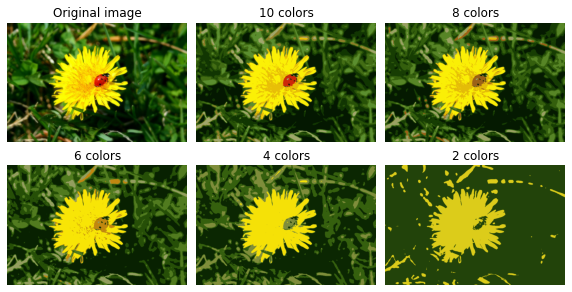

In [74]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title(f"{n_clusters} colors")
    plt.axis("off")
    
save_fig("image_segmented_diagram", tight_layout=False)
plt.show()

클러스터 개수를 8보다 작게하면 무당 벌레가 하나의 클러스터가 되지 못함

# 군집을 사용한 전처리

군집은 차원 축소에 효과적

지도 학습 전에 전처리 단계로 사용가능

8x8 mnist 데이터셋 사용

In [75]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [76]:
#로지스틱 회귀 훈련 - 로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9733333333333334

In [90]:
#k-평균을 활용한 전처리

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)), #숫자가 10개 이므로 10개로 지정할 수 있지만, 글씨체가 다르므로 더 크게 하는 것이 좋음
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42, n_jobs=-1))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr', n_jobs=-1,
                                    random_state=42))])

In [91]:
pipeline.score(X_test, y_test)

0.98

정확도가 더 좋아졌지만 좋은 k 값을 찾아보자

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=5 ............................................
[CV] ............................. kmeans__n_clusters=5, total=   0.1s
[CV] 

[CV] ............................ kmeans__n_clusters=22, total=   0.4s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.5s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.5s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.5s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.5s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.4s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   0.7s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.7s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.8s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.7s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.8s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.7s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.7s
[CV] kmeans__n_clusters=44 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=61, total=   0.9s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.9s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.9s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   1.1s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   1.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.9s
[CV] kmeans__n_clusters=63 ...........................................
[CV] ............................ kmeans__n_clusters=63, total=   1.2s
[CV] kmeans__n_clusters=63 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=80, total=   1.3s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   1.2s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   1.0s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   1.0s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   1.4s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   1.1s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.9s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   1.3s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  3.8min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           n_jobs=-1,
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [93]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [94]:
grid_clf.score(X_test, y_test)

0.98

음.... 왜 그리드 탐색을 하면 더 안좋게 나올까...-_-

# 군집을 사용한 준지도 학습

In [102]:
#준지도 학습
#레이블 이 없는 데이터가 많고 레이블이 있는 데이터는 작을 때

n_labeled=50 #레이블된 데이터가 50개 밖에 없을 때

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test), y_train[:n_labeled]

(0.8333333333333334,
 array([5, 2, 0, 8, 7, 3, 7, 0, 2, 2, 3, 5, 8, 7, 3, 6, 5, 9, 9, 2, 5, 6,
        3, 0, 7, 1, 1, 9, 6, 1, 1, 0, 0, 2, 9, 3, 9, 9, 3, 7, 7, 1, 3, 5,
        4, 6, 1, 2, 1, 1]))

In [105]:
#훈련 세트를 50-개의 클러스터로 모으기
k=50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) #transform을 추가해야 8x8의 구조가 유지된다.
print(X_train.shape, X_digits_dist.shape)#원본 데이터는 8*8픽셀의 숫자 1347개, 예측 결과는 각 데이터에 대한 50개의 클러스터와의 거리
rep_digit_idx = np.argmin(X_digits_dist, axis=0)#50개 클러스터에 대해 가장 가까운 숫자 찾기
X_rep_digits = X_train[rep_digit_idx] #50개의 클러스터에 대해 가장 가까운 숫자가 클러스터를 대표하는 숫자로!

X_rep_digits.shape #각 대표하는 숫자에 대한 8*8 이미지 데이터

(1347, 64) (1347, 50)


(50, 64)

그림 저장: representative_images_diagram


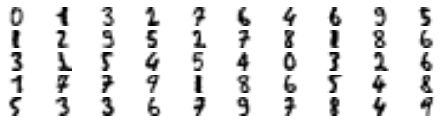

In [100]:
#클러스터를 대표하는 50개 이미지 출력

plt.figure(figsize=(8, 2))
for index, X_rep_digit in enumerate(X_rep_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_rep_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [106]:
#50개 대표이미지에 대한 레이블

y_rep_digits = y_train[rep_digit_idx]

y_rep_digits

array([0, 1, 3, 2, 7, 6, 4, 6, 9, 5, 1, 2, 9, 5, 2, 7, 8, 1, 8, 6, 3, 1,
       5, 4, 5, 4, 0, 3, 2, 6, 1, 7, 7, 9, 1, 8, 6, 5, 4, 8, 5, 3, 3, 6,
       7, 9, 7, 8, 4, 9])

In [107]:
#클러스터의 대표 이미지 50개를 가지고 성능 측정

#ovr : 분류기를 여러개 훈련하고, 각 분류기중에 가장 높은 것을 클래스로 선택, 기본은 auto
#solver 기본값 lbfgs
#max_iter 기본값 100
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=42, n_jobs=-1)
log_reg.fit(X_rep_digits, y_rep_digits)
log_reg.score(X_test, y_test)

0.9244444444444444

50개의 대표 이미지를 활용함으로써 83.3%에서 92.4%로 향상되었다.

대표 이미지의 레이블을 같은 클러스터에 있는 모든 이미지에 전파

In [108]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):    
    #i번째 클러스터로 에측된 이미지에 대해 i번째 클러스터의 대표 이미지 레이블 추가
    y_train_propagated[kmeans.labels_==i] = y_rep_digits[i] 
    
kmeans.labels_, kmeans.labels_.shape, kmeans.labels_==1 #labels_는 각 이미지에 대한 클러스터 예측 결과

(array([13, 14, 26, ..., 39,  4, 10]),
 (1347,),
 array([False, False, False, ..., False, False, False]))

In [109]:
#전체 샘플로 확장된 레이블에 대해 로지스틱 학습

log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=42, n_jobs=-1)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', n_jobs=-1, random_state=42)

In [110]:
log_reg.score(X_test, y_test)

0.9377777777777778

92.4% -> 93.7%로 향상

전체 샘플에 레이블을 전파하는 대신에 센트로이드에 가까운 샘플에만 레이블을 전파하는 것이 나을지도.

전체 샘플은 일부 이상치를 포함하기 때문.

레이블에 가까운 20번째 백분위수까지 전파

In [131]:
a = np.arange(9).reshape(3, 3)

i = [0, 1, 2]
j = [0, 1, 0]

a, a[i, j] #행의 개수와 같은 1차원 배열 -> i번째 행에 대해서 j번째 값을 가져오기

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([0, 4, 6]))

In [137]:
percentile_closest = 20

#X_digits_dist는 각 데이터로 부터 50개 클러스터 까지의 거리
#labels_는 전체 훈련 데이터에 대한 예측 결과
#전체 훈련 데이터의 각 클러스터로 거리 중에서, 에측 값에 해당하는 거리 값을 가져오기(최소 거리 값)
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster_idx = (kmeans.labels_ == i)#예측 값 중 i번째 클러스터에 속한 것들의 인덱스
    in_cluster_dist = X_cluster_dist[in_cluster_idx]
    cutoff_distance = np.percentile(in_cluster_dist, percentile_closest) #백분위 20에 해당하는 값 구하기
    above_cufoff_idx = (X_cluster_dist > cutoff_distance) #백분위 20보다 큰 것들의 인덱스
    X_cluster_dist[in_cluster_idx & above_cufoff_idx] = -1 #백분위 20보다 큰 것들의 클러스터 거리를 -1로 설정

X_digits_dist, X_cluster_dist, (X_cluster_dist > -1).sum()

(array([[41.52526381, 47.80543271, 53.28606227, ..., 40.84863485,
         33.42329319, 45.35671763],
        [51.57028789, 55.26223803, 42.55626876, ..., 43.60992152,
         53.69754997, 62.09003954],
        [17.68832797, 53.78479191, 46.78038512, ..., 41.03618053,
         43.17301972, 49.18269733],
        ...,
        [46.20281892, 46.98687906, 39.79532121, ..., 35.41242071,
         50.51847709, 54.14682717],
        [42.16801694, 38.66939823, 45.43803427, ..., 33.62986935,
         30.22067077, 42.76745683],
        [50.33500015, 44.86428246, 50.47025399, ..., 32.67650267,
         43.21772438, 51.93318172]]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 289)

In [142]:
partially_propagated_idx = (X_cluster_dist != -1)

#전체 전파된 것들 중에 백분위 20밑에 것들만(가까운 것들만) 추리기
X_train_partially_propagated = X_train[partially_propagated_idx]
y_train_partially_propagated = y_train_propagated[partially_propagated_idx] 

In [150]:
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

0.9222222222222223

왜 더 나쁜 값이 나오는지는 의문 -_-

In [151]:
#하지만 실제 데이터와 정확도는 거의 99%
np.mean(y_train_partially_propagated == y_train[partially_propagated_idx])

0.9896193771626297

# DBSCAN

모든 클러스터가 충분히 밀집되어 있고, 밀집되지 않은 지역과 잘 구분될 대 좋은 성능

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5) #각 샘플에서 eps(엡실론)의 거리안에 5개의 샘플이 있는지 확인
dbscan.fit(X)

DBSCAN(eps=0.05)

In [4]:
dbscan.labels_, dbscan.labels_.shape

(array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
         2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
         1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
         2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
         3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
         0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
         2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
         4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
         3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
         1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
         1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
         1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
         2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
         2, 

인덱스가 -1인 것들은 이상치로 판단했다는 것.

In [5]:
#핵심 샘플의 인덱스
dbscan.core_sample_indices_.shape, dbscan.core_sample_indices_

((808,),
 array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
         18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
         32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
         51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
         97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
        115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
        150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
        179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
        196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
        211, 212, 213, 214, 215, 216, 217,

In [6]:
#핵심 샘플
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [7]:
#총 레이블 개수(7개)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [8]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [10]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool) #예측값 배열과 동일한 사이즈의 0으로 채운 배열
    core_mask[dbscan.core_sample_indices_] = True         #핵심 샘플 인덱스에 True마킹
    anomalies_mask = dbscan.labels_ == -1                 #이상치 샘플 인덱스
    non_core_mask = ~(core_mask | anomalies_mask)         #핵심도 아니도 이상치도 아닌 일반 인덱스

    cores = dbscan.components_                             #핵심 샘플 좌표
    anomalies = X[anomalies_mask]                          #이상치 좌표
    non_cores = X[non_core_mask]                           #일반 좌표
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired") #c는 색상, 핵심요소에 대해 색상 지정
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask]) #핵심 샘플 분포도
    plt.scatter(anomalies[:, 0], anomalies[:, 1],          #이상치 분포도
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".") #일반 샘플
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

그림 저장: dbscan_plot


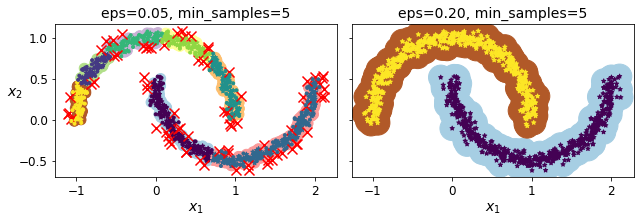

In [11]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

#엡실론을 0.2로 높이자 이상치가 없어졌다!

In [12]:
#DBSCAN은 새로운 샘플에 대한 클러스터 예측 불가능.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_]) #핵심 샘플과 핵심 샘플의 예측값으로

KNeighborsClassifier(n_neighbors=50)

In [13]:
X_new = np.array([
    [-0.5, 0],
    [0, 0.5],
    [1, -0.1],
    [2, 1]
])

knn.predict(X_new), knn.predict_proba(X_new)

(array([1, 0, 1, 0], dtype=int64),
 array([[0.18, 0.82],
        [1.  , 0.  ],
        [0.12, 0.88],
        [1.  , 0.  ]]))

그림 저장: cluster_classification_plot


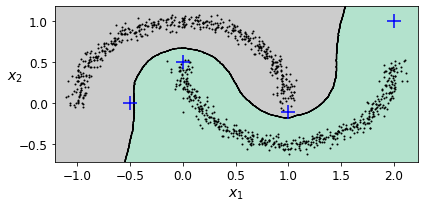

In [15]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [16]:
#가장 가까운 k개 이웃의 거리와 인덱스 반환

y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan2.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1 #거리가 엡실론(여기서는 0.2)보다 큰 것은 이상치로 설정
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

# 가우시안 혼합(GMM)

타원형 클러스터에 적합

In [27]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [28]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [29]:
gm.weights_, gm.means_, gm.covariances_

(array([0.39054348, 0.2093669 , 0.40008962]),
 array([[ 0.05224874,  0.07631976],
        [ 3.40196611,  1.05838748],
        [-1.40754214,  1.42716873]]),
 array([[[ 0.6890309 ,  0.79717058],
         [ 0.79717058,  1.21367348]],
 
        [[ 1.14296668, -0.03114176],
         [-0.03114176,  0.9545003 ]],
 
        [[ 0.63496849,  0.7298512 ],
         [ 0.7298512 ,  1.16112807]]]))

In [30]:
#알고리즘의 수렴 여부, 반복 회수

gm.converged_, gm.n_iter_

(True, 4)

In [31]:
#하드 군집(특정 클러스터에 배치), 소프트 군집(특정 클러스터에 속할 확률)
gm.predict(X), gm.predict_proba(X)

(array([0, 0, 2, ..., 1, 1, 1], dtype=int64),
 array([[9.77227791e-01, 2.27715290e-02, 6.79898914e-07],
        [9.83288385e-01, 1.60345103e-02, 6.77104389e-04],
        [7.51824662e-05, 1.90251273e-06, 9.99922915e-01],
        ...,
        [4.35053542e-07, 9.99999565e-01, 2.17938894e-26],
        [5.27837047e-16, 1.00000000e+00, 1.50679490e-41],
        [2.32355608e-15, 1.00000000e+00, 8.21915701e-41]]))

In [32]:
#가우시안 혼합 모델을 생성 모델이므로 새로운 샘플을 생성할 수 있음

X_new, y_new = gm.sample(6)

X_new, y_new

(array([[-0.8690223 , -0.32680051],
        [ 0.29945755,  0.2841852 ],
        [ 1.85027284,  2.06556913],
        [ 3.98260019,  1.50041446],
        [ 3.82006355,  0.53143606],
        [-1.04015332,  0.7864941 ]]),
 array([0, 0, 1, 1, 1, 2]))

In [33]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

그림 저장: gaussian_mixtures_plot


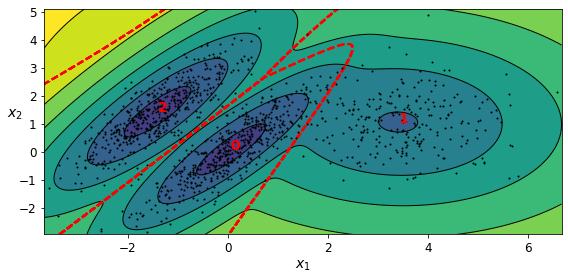

In [34]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

In [37]:
#이상치 탐지
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)#4%미만
anomalies = X[densities < density_threshold]
anomalies

array([[-0.11118987,  1.61334992],
       [ 0.62362922,  4.41540435],
       [ 1.49808977, -0.15251688],
       [ 0.74219223, -1.00445177],
       [-2.53940854, -2.76549965],
       [-1.62447969, -0.45770022],
       [-1.74680316, -0.78385111],
       [-3.58308316, -1.28249917],
       [ 0.53903026,  5.00244257],
       [-0.51480414, -2.16270124],
       [-1.81015204, -0.58926015],
       [-1.79651788, -0.97031471],
       [-2.11225785, -2.09712817],
       [-3.39408574, -2.28378778],
       [ 1.58082729,  4.20122873],
       [-2.48037945, -1.18651064],
       [-2.93972237, -1.41660564],
       [-1.62285961, -2.84860478],
       [-0.25954463, -1.7743691 ],
       [ 0.46018217,  2.78323717],
       [-2.06317379,  2.2670332 ],
       [ 0.13982849,  2.08023553],
       [-2.54004484, -2.8290338 ],
       [-1.93037427, -1.19447352],
       [-0.27124433, -1.86750177],
       [-1.15568262, -2.57480367],
       [-1.93315582,  2.49030105],
       [ 4.93207567, -0.42157602],
       [ 5.80546094,

그림 저장: mixture_anomaly_detection_plot


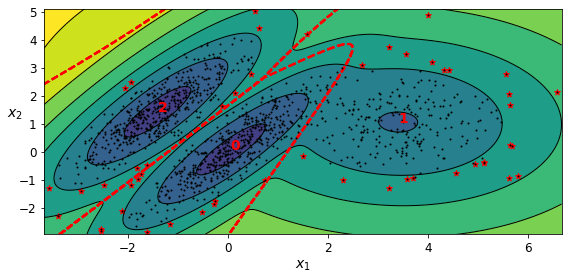

In [38]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

# 모델 선택

k-평균 군집에서는 실루엣 점수로 클러스터 개수 k를 선택할 수 있지만, 이런 지표는 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않다.

BIC, AIC와 같은 이론적 정보 기준을 최소화하는 모델을 찾아야 한다.

In [39]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
            for k in range(1, 11)]

In [40]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

그림 저장: aic_bic_vs_k_plot


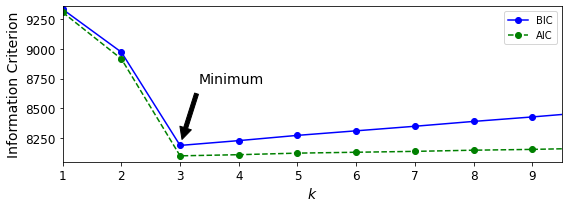

In [41]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

k=3에서 AIC, BIC모두 작으므로 최선의 선택

In [42]:
#클러스터 개수와 covariance_type 하이퍼파라미터의 최적 조합

min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [43]:
best_k, best_covariance_type

(3, 'full')

# 베이즈 가우시안 혼합 모델

최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0에 가깝게 만듬

자동으로 불필요한 클러스터를 제거

In [45]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42) #클러스터개수 10개
bgm.fit(X)
np.round(bgm.weights_, 2)

c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

알고리즘이 3개의 클러스터가 필요하다는 것을 감지함

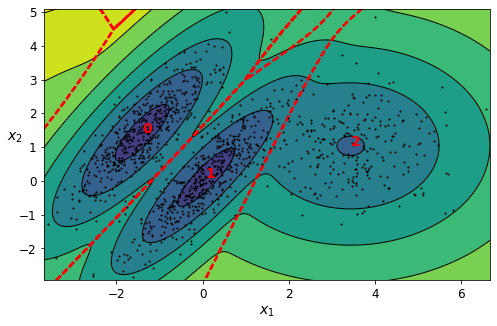

In [46]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

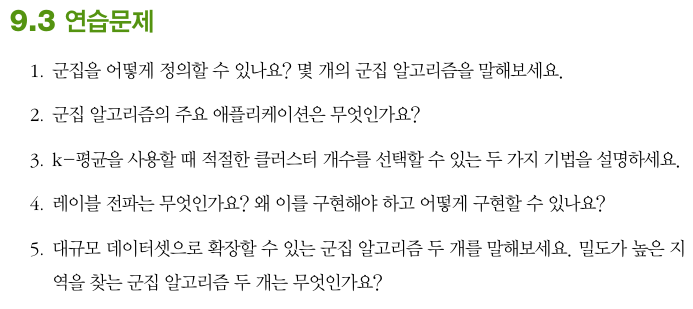
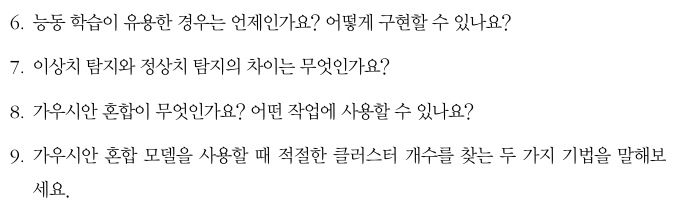

1. 군집은 비슷한 샘플을 보으는 비지도 작업  
   일반적으로 가까이 있는 샘플  
   k-평균, DBSCAN, 가우시안 혼합, 베이즈 가우시안 혼합
   
   
2. 데이터 분석, 고객 분류, 추천 시스템, 이상치 탐지, 이미지 분할, 준지도 학습, 차원 축소 등


3. 엘보 규칙 : 이너셔가 더는 빠르게 감소하지 않는 지점 찾기  
   클러스터 개수의 함수로 실루엣 점수 그래프를 그려서 뽀쪽하게 올라간 지점 찾기
   
   
4. 훈련 샘플 중에 일부만 레이블을 가지고 있을 때, 일부 레이블을 전체 샘플에 전파  
   레이블 부여하는 작업은 어려운 작업이므로  
   클러스터 마다 대표 레이블을 구하고, 클러스터로 분류된 샘플에 대표 레이블 부여
   
   
5. k-평균, BIRCH를 대규모 데이터 셋에 적용가능.  
   DBSCAN이 평균-이동 이 밀도가 높은 지역을 찾음
   
   
6. 레이블이 없는 샘플이 많고 레이블을 부여하는 것에 비용이 많이 들 때


7. 이상치 탐지는 훈련 세트에 포함되어 있는 이상치와 새로운 샘플 사이에 있는 이상치를 구별하는 것.
   특이치 탐지는 '깨끗'하다고 가정한 데이터 셋으로 훈련하고 새로운 샘플 사이에서 특이한 것을 탐지
   
   
8. 데이터가 유한한 개수의 타원 모양 클러스터로 그룹지어 있다고 가정하는 확률 모델


9. 클러스터 개수의 함수로 BIC, AIC 최소 지점의 클러스터 개수 선택
   베이즈 가우시안 혼합 모델로 클러스터 개수 자동으로 선택

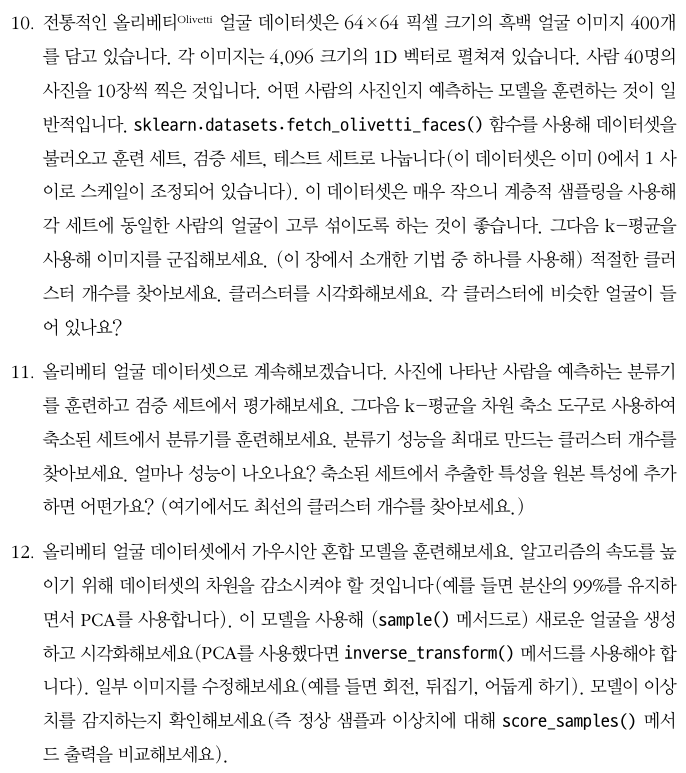
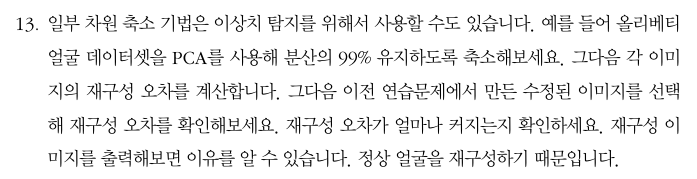

In [47]:
#연습 문제 10 - 올리베타 얼굴 데이터셋 군집하기

from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\OnLifeCoding\scikit_learn_data


In [48]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [49]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [50]:
#데이터셋은 이미 0~1사이로 스케일 조정되어 있다
#샘플 수가 적으니 계층적 샘플링으로 고루 섞이도록 하는 것이 좋다

from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42) #다시 섞고 나누는 횟수 1
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

#훈련 세트에서 검증 세트 분리
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [51]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [55]:
#PCA로 차원 줄이기

from sklearn.decomposition import PCA

pca = PCA(n_components=0.99) #99%의 분산을 가지는 차원 개수를 구하도록
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_ #99%분산을 가지는 차원 개수는

199

In [57]:
#k-평균을 사용하여 이미지를 군집. 적절한 클러스터 개수를 찾아보자

from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


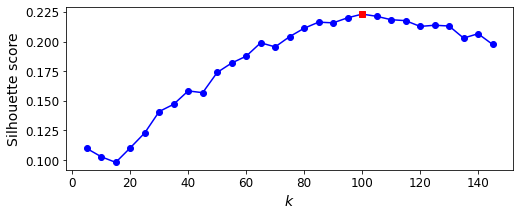

In [58]:
#실루엣 점수 그래프

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                    for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [59]:
best_k

100

인물이 40명이지만, 최적의 클러스터는 100개다.

안경 착용이나 서 있는 방향 등으로 같은 사람이 다르게 구별되는 경우도 있을 수 있으므로...

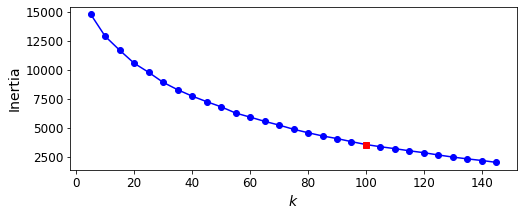

In [60]:
#이너샤 확인

inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

이너샤 그래프에서는 엘보우가 나타나지 않아서 최적의 클러스터가 안보인다. 그냥 k=100 사용

In [61]:
best_model = kmeans_per_k[best_index]

클러스터 0


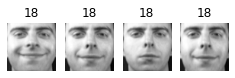

클러스터 1


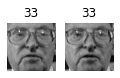

클러스터 2


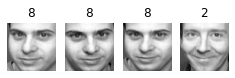

클러스터 3


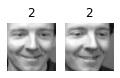

클러스터 4


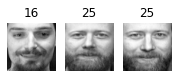

클러스터 5


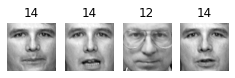

클러스터 6


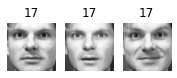

클러스터 7


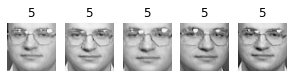

클러스터 8


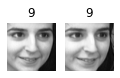

클러스터 9


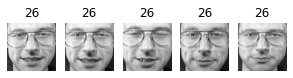

클러스터 10


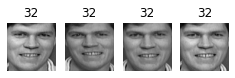

클러스터 11


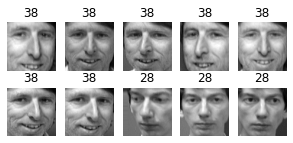

클러스터 12


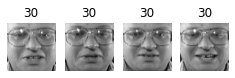

클러스터 13


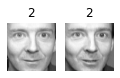

클러스터 14


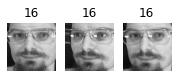

클러스터 15


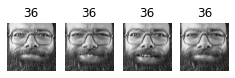

클러스터 16


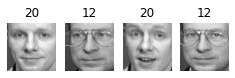

클러스터 17


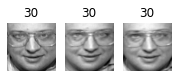

클러스터 18


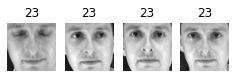

클러스터 19


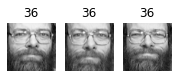

클러스터 20


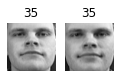

클러스터 21


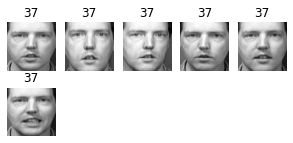

클러스터 22


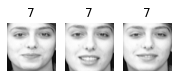

클러스터 23


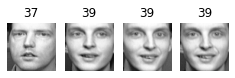

클러스터 24


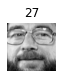

클러스터 25


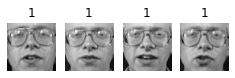

클러스터 26


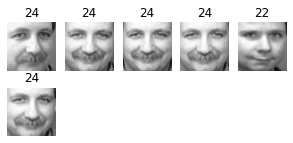

클러스터 27


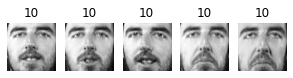

클러스터 28


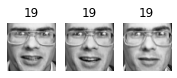

클러스터 29


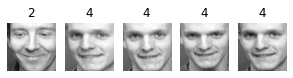

클러스터 30


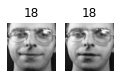

클러스터 31


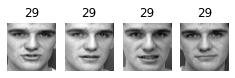

클러스터 32


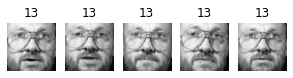

클러스터 33


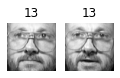

클러스터 34


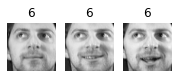

클러스터 35


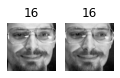

클러스터 36


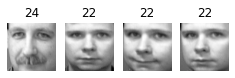

클러스터 37


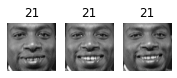

클러스터 38


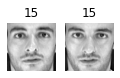

클러스터 39


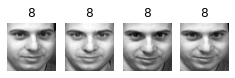

클러스터 40


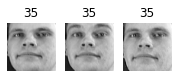

클러스터 41


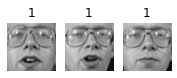

클러스터 42


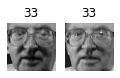

클러스터 43


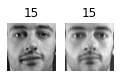

클러스터 44


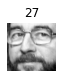

클러스터 45


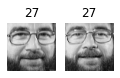

클러스터 46


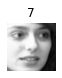

클러스터 47


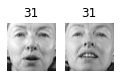

클러스터 48


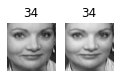

클러스터 49


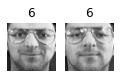

클러스터 50


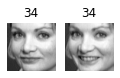

클러스터 51


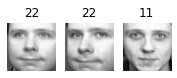

클러스터 52


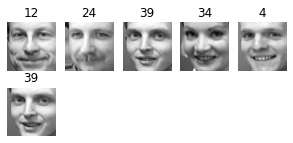

클러스터 53


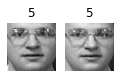

클러스터 54


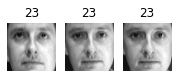

클러스터 55


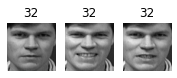

클러스터 56


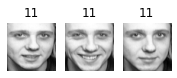

클러스터 57


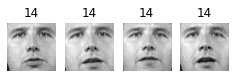

클러스터 58


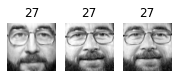

클러스터 59


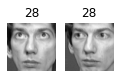

클러스터 60


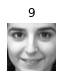

클러스터 61


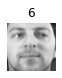

클러스터 62


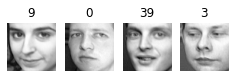

클러스터 63


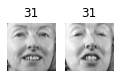

클러스터 64


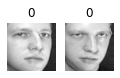

클러스터 65


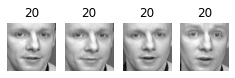

클러스터 66


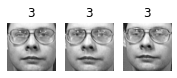

클러스터 67


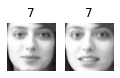

클러스터 68


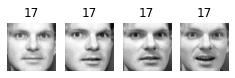

클러스터 69


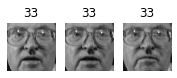

클러스터 70


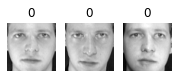

클러스터 71


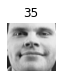

클러스터 72


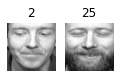

클러스터 73


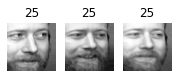

클러스터 74


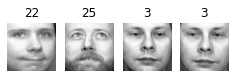

클러스터 75


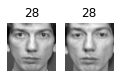

클러스터 76


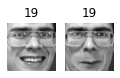

클러스터 77


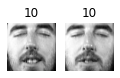

클러스터 78


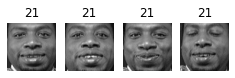

클러스터 79


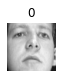

클러스터 80


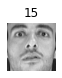

클러스터 81


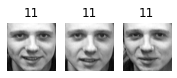

클러스터 82


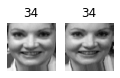

클러스터 83


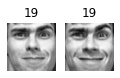

클러스터 84


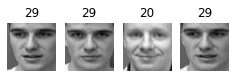

클러스터 85


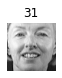

클러스터 86


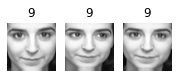

클러스터 87


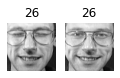

클러스터 88


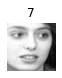

클러스터 89


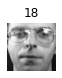

클러스터 90


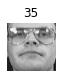

클러스터 91


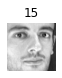

클러스터 92


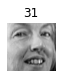

클러스터 93


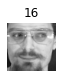

클러스터 94


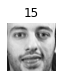

클러스터 95


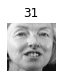

클러스터 96


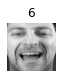

클러스터 97


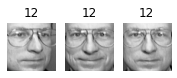

클러스터 98


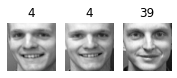

클러스터 99


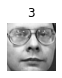

In [62]:
# 클러스터 시각화 하기

def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
for cluster_id in np.unique(best_model.labels_): #예측 값에서 클러스터 번호를 중복없이
    print("클러스터", cluster_id)
    in_cluster_idx = best_model.labels_ == cluster_id #현재 클러스터로 분류된 것들의 인덱스
    faces = X_train[in_cluster_idx].reshape(-1, 64, 64)
    labels = y_train[in_cluster_idx]
    plot_faces(faces, labels)

일부 클러스터가 몇명의 이미지가 섞여 있음.

모델을 훈련할 때 바로 사용하기는 어렵지만, 새로운 데이터셋에 이미지를 레이블링 할 때는 매우 유용할 수 있다.

In [64]:
#연습 문제 11 - 분류를 위해 군집으로 전처리하기

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
clf.fit(X_train_pca, y_train)

clf.score(X_valid_pca, y_valid)

0.925

In [65]:
#k-평균을 통해 차원을 축소하고, 축소된 세트에서 분류기를 훈련

X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.75

In [68]:
#분류기 성능을 최대로 만드는 클러스터 개수 찾아보기

#검증 세트가 이미 있으므로 k-폴드 검증 대신에 간단하게 작업

from sklearn.pipeline import Pipeline

for n_cluster in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_cluster, random_state=n_cluster)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))
    ])
        
    pipeline.fit(X_train_pca, y_train)
    print(n_cluster, pipeline.score(X_valid_pca, y_valid))

5 0.3375
10 0.5375
15 0.5875
20 0.6625
25 0.65
30 0.7375
35 0.725
40 0.75
45 0.6875
50 0.7
55 0.725
60 0.775
65 0.7625
70 0.7
75 0.7625
80 0.725
85 0.7125
90 0.7125
95 0.75
100 0.7375
105 0.7375
110 0.75
115 0.7375
120 0.7125
125 0.7625
130 0.7375
135 0.775
140 0.8
145 0.75


클러스터 개수를 튜닝해도 80%가 한계다.

In [69]:
#축소된 데이터에서 추출한 특성을 원본 데이터에 추가하면 어떨까?

X_train_extended = np.c_[X_train_pca, X_train_reduced] #컬럼 이어 붙이기(특성 추가)
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

X_train_pca.shape, X_train_reduced.shape, X_train_extended.shape

((280, 199), (280, 100), (280, 299))

In [70]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.825

조금 더 낫긴 하지만 클러스터는 분류기를 직접 훈련하는 데 도움이 되지 않는다.

In [73]:
#연습문제 12 - 올리베티 얼굴 데이터셋을 위한 가우시안 혼합 모델

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [74]:
# 이 모델을 사용해 새로운 얼굴 생성 및 시각화(PCA를 사용했다면 역변환 해야 함)

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

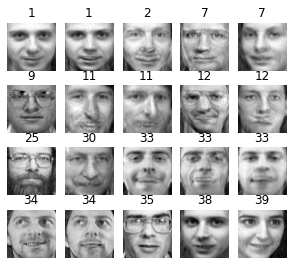

In [76]:
plot_faces(gen_faces, y_gen_faces)

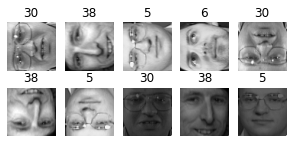

In [77]:
#일부 이미지를 수정해서 모델이 이상치를 감지하는지 확인

n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [79]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [80]:
gm.score_samples(X_bad_faces_pca)

array([-1.79997522e+07, -2.26427584e+07, -3.96415490e+07, -4.60254355e+07,
       -3.13975350e+07, -1.39330434e+07, -2.90882788e+07, -1.06298646e+08,
       -1.20931032e+08, -7.49740312e+07])

In [81]:
gm.score_samples(X_train_pca[:10])

array([1163.02020897, 1149.16682252, 1148.47710505, 1170.67602771,
       1088.46009567, 1075.71700187, 1075.71700622, 1088.46008943,
       1096.42609711, 1119.68626995])

일반 훈련 데이터와 비교해보면 변경을 가한 사진 데이터는 가우시안 혼합 모델에서 등장할 가능성이 매우 낮음

In [82]:
# 차원 축소 기법을 사용해 이상치 탐지하기

#99% 분산을 유지하도록 축소된 데이터는 이미 있음
X_train_pca

array([[ 3.7808332e+00, -1.8547927e+00, -5.1440282e+00, ...,
        -1.3563582e-01, -2.1407957e-01,  6.1192032e-02],
       [ 1.0148855e+01, -1.5275431e+00, -7.6697552e-01, ...,
         1.2392897e-01, -1.3526770e-01, -2.3277469e-02],
       [-1.0015288e+01,  2.8772843e+00, -9.1988838e-01, ...,
         7.2609223e-02, -2.9641828e-03,  1.2489059e-01],
       ...,
       [ 2.4758651e+00,  2.9559739e+00,  1.2998531e+00, ...,
        -2.0913735e-02,  3.4851175e-02, -1.5432632e-01],
       [-3.2203162e+00,  5.3489780e+00,  1.3942678e+00, ...,
         5.7549074e-02, -2.2831230e-01,  1.5557989e-01],
       [-9.2287672e-01, -3.6470301e+00,  2.2608826e+00, ...,
         1.3684991e-01, -6.9128953e-02,  6.2686205e-02]], dtype=float32)

In [92]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=1)
    return mse

In [93]:
reconstruction_errors(pca, X_train).mean()

0.0001920535

In [94]:
reconstruction_errors(pca, X_bad_faces).mean()

0.004707354

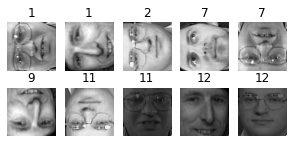

In [95]:
plot_faces(X_bad_faces, y_gen_faces)

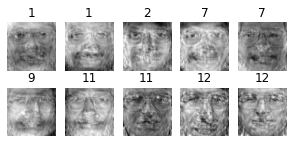

In [96]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)